In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-sindhi'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

منهنجو هي آرلينڊو ۾ مئل ۽ زخمين جي دوستن ۽ ڪٽنب لاءِ درد آهي...senseless #orlandohorror #prayers 0
هن هفتي جي آخر ۾ اسان جي نئين گهر ۾ منتقل ٿيڻ جو انتظار نٿو ڪري سگھجي ð borda ⁇ « ۽ هڪ هفتي لاءِ ð ⁇  @user â ⁇ ¤aytâ ⁇ ¤ay attâ ⁇ ¤ait 0
#صفائي # جڳھون. ٺاھڻ # منهن.  0
رستي تي اتحادي پالي #boxcup @user @user @user @user  0
مھرباني ڪري فالو ڪريو https://t.co/rC6EFF0AVH 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

منهنجو آرلينڊو ۾ مئل زخمين جي دوستن ڪٽنب لاءِ درد آهيsenseless 0
هن هفتي جي ۾ اسان جي نئين گهر ۾ منتقل جو انتظار نٿو ڪري سگھجي ð borda ⁇ « هفتي لاءِ ð ⁇ â ⁇ ¤aytâ ⁇ ¤ay attâ ⁇ ¤ait 0
جڳھون ٺاھڻ منهن 0
رستي اتحادي پالي 0
مھرباني ڪري فالو ڪريو 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:28<00:00,  4.60it/s, loss=0.0849]


Train loss 0.2146005567691104 accuracy 0.9115193254756991
Validation loss 0.15031708296822402 accuracy 0.9412077478161793
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9412077478161793
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:26<00:00,  4.63it/s, loss=0.0636]


Train loss 0.14610243117821362 accuracy 0.9424856625606097
Validation loss 0.13967707666378576 accuracy 0.945271553361185
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.945271553361185
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:26<00:00,  4.64it/s, loss=0.0263]


Train loss 0.12471403415175343 accuracy 0.9513729759839977
Validation loss 0.14036932593048776 accuracy 0.9457273072540828
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9457273072540828
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:26<00:00,  4.64it/s, loss=0.689]


Train loss 0.5094985938868541 accuracy 0.7096177948828318
Validation loss 0.6685871730730372 accuracy 0.6105582985187998
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:26<00:00,  4.64it/s, loss=0.753]


Train loss 0.669280912084618 accuracy 0.6096798288369266
Validation loss 0.6778757978700897 accuracy 0.6105582985187998
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:25<00:00,  4.65it/s, loss=0.707]


Train loss 0.6629581938871005 accuracy 0.6086796895770297
Validation loss 0.7344137486612913 accuracy 0.6105582985187998
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:30<00:00,  4.56it/s, loss=0.0801]


Train loss 0.27430715392445504 accuracy 0.8690703768879211
Validation loss 0.150574425144971 accuracy 0.9439042916824915
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:24<00:00,  4.67it/s, loss=0.0453]


Train loss 0.12726708146241994 accuracy 0.9517654356935775
Validation loss 0.14721906072125562 accuracy 0.9457273072540828
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


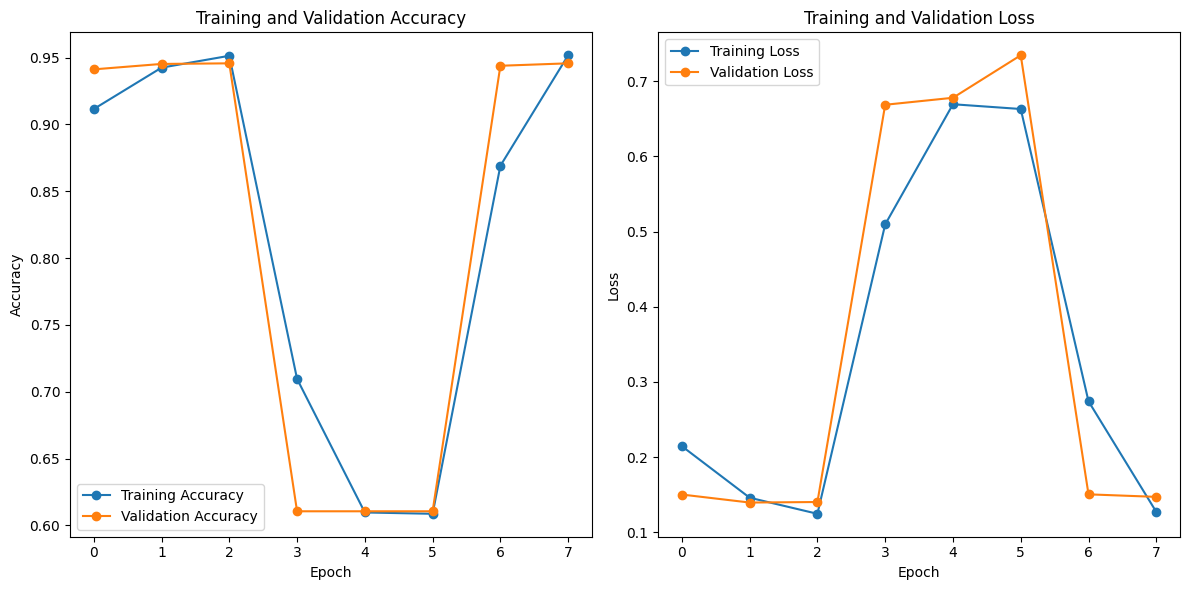

In [9]:
hlp.plot_history(history)

In [7]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [8]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9434865172806685 Test Loss: 0.14468563393716818


Accuracy: 0.94
F1 Score: 0.94
Precision: 0.94
Recall: 0.94

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.97      0.94      0.95     16504
        Hate       0.91      0.95      0.93      9826

    accuracy                           0.94     26330
   macro avg       0.94      0.94      0.94     26330
weighted avg       0.94      0.94      0.94     26330



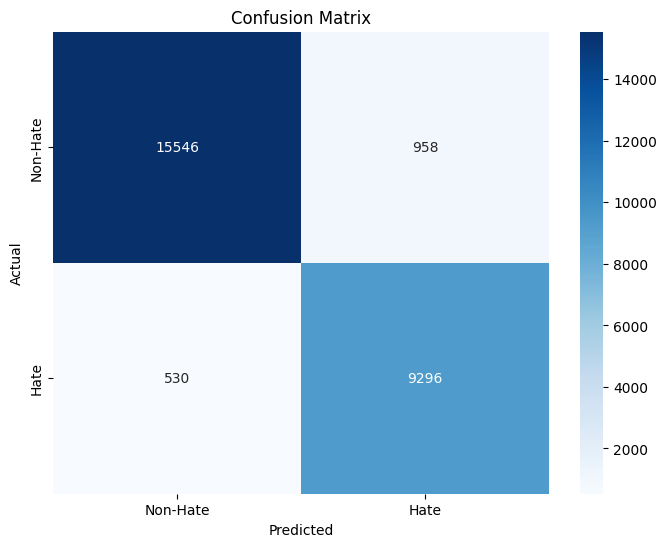

In [9]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [10]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.51
